# Plotting

This notebook explains how to plot LCIA results. For this, we first choose activities and methods to perform an LCIA. Then, we plot the result using pandas.

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import brightway2 as bw

## Choosing activities

In this example, we want to compare three ecoinvent activities. Don't forget to activate the brightway project into which you have imported ecoinvent previously.

In [2]:
# activate project
bw.projects.set_current('ab')

Next, we look through the ecoinvent database and choose three activities to compare. In this case, electricity production from wind, PV and natural gas in Germany.

In [3]:
db_name = 'apos37'
act1 = bw.Database(db_name).search(
    'electricity production, wind, >3MW', 
    filter={'location':'DE'}
)[0]
act2 = bw.Database(db_name).search(
    'electricity production, photovoltaic, 3kWp slanted-roof installation, multi-Si', 
    filter={'location':'DE'}
)[0]
act3 = bw.Database(db_name).search(
    'electricity production, natural gas, combined cycle power plant', 
    filter={'location':'DE'}
)[0]

act1, act2, act3

Excluding 217 filtered results
Excluding 116 filtered results
Excluding 562 filtered results


('electricity production, wind, >3MW turbine, onshore' (kilowatt hour, DE, None),
 'electricity production, photovoltaic, 3kWp slanted-roof installation, multi-Si, panel, mounted' (kilowatt hour, DE, None),
 'electricity production, natural gas, combined cycle power plant' (kilowatt hour, DE, None))

## Choosing methods

Next, we choose methods for the impact assessment. In this case ILCD 2.0 including long-term impacts.

In [4]:
methods = sorted(
    [m for m in bw.methods if "ILCD 2.0 2018 midpoint" in str(m) and 
     'no LT' not in str(m) and 'incl. biogenic' not in str(m)]
)
methods

[('ILCD 2.0 2018 midpoint', 'climate change', 'climate change biogenic'),
 ('ILCD 2.0 2018 midpoint', 'climate change', 'climate change fossil'),
 ('ILCD 2.0 2018 midpoint',
  'climate change',
  'climate change land use and land use change'),
 ('ILCD 2.0 2018 midpoint', 'climate change', 'climate change total'),
 ('ILCD 2.0 2018 midpoint',
  'ecosystem quality',
  'freshwater and terrestrial acidification'),
 ('ILCD 2.0 2018 midpoint', 'ecosystem quality', 'freshwater ecotoxicity'),
 ('ILCD 2.0 2018 midpoint', 'ecosystem quality', 'freshwater eutrophication'),
 ('ILCD 2.0 2018 midpoint', 'ecosystem quality', 'marine eutrophication'),
 ('ILCD 2.0 2018 midpoint', 'ecosystem quality', 'terrestrial eutrophication'),
 ('ILCD 2.0 2018 midpoint', 'human health', 'carcinogenic effects'),
 ('ILCD 2.0 2018 midpoint', 'human health', 'ionising radiation'),
 ('ILCD 2.0 2018 midpoint', 'human health', 'non-carcinogenic effects'),
 ('ILCD 2.0 2018 midpoint', 'human health', 'ozone layer depletion')

## Calculating the LCIA scores

Next, we define a function that does the LCIA calculations for us. We saw how to do this in a previous notebook, so I won't go into details here.

In [5]:
def calculate_lcia_results(activities, methods):
    """
    Calculates LCIA results for all activities in label_act and all methods in label_method
    :param label_act: dict containing label:activity pairs
    :param label_m: dict containing label:method pairs
    :return: dataframe containing lcia results
    """

    # prepare result store
    results = {}

    # start calculation
    for act in activities:
        # define functional unit (final demand)
        fu = {bw.get_activity(act): 1}
        # instantiate lca object
        lca = bw.LCA(fu)
        # do LCI (matrix inversion)
        lca.lci()
        # extend results object
        results[str(act)] = {}
        for  method in methods:
            # activate current lcia method
            lca.switch_method(method)
            # calculate lcia result
            lca.lcia()
            # store result
            results[str(act)][str(method)] = lca.score

    # convert dict of results to dataframe
    return pd.DataFrame(results)

df = calculate_lcia_results([act1, act2, act3], methods)
df

,"'electricity production, wind, >3MW turbine, onshore' (kilowatt hour, DE, None)","'electricity production, photovoltaic, 3kWp slanted-roof installation, multi-Si, panel, mounted' (kilowatt hour, DE, None)","'electricity production, natural gas, combined cycle power plant' (kilowatt hour, DE, None)"
"('ILCD 2.0 2018 midpoint', 'climate change', 'climate change biogenic')",8.200771e-05,4.388205e-04,6.532204e-05
"('ILCD 2.0 2018 midpoint', 'climate change', 'climate change fossil')",3.148162e-02,9.537874e-02,4.300353e-01
"('ILCD 2.0 2018 midpoint', 'climate change', 'climate change land use and land use change')",1.100778e-04,2.096568e-04,1.278100e-05
"('ILCD 2.0 2018 midpoint', 'climate change', 'climate change total')",3.167371e-02,9.602722e-02,4.301134e-01
"('ILCD 2.0 2018 midpoint', 'ecosystem quality', 'freshwater and terrestrial acidification')",2.068838e-04,5.807309e-04,4.974314e-04
"('ILCD 2.0 2018 midpoint', 'ecosystem quality', 'freshwater ecotoxicity')",1.550215e-01,1.618358e-01,2.567960e-02
"('ILCD 2.0 2018 midpoint', 'ecosystem quality', 'freshwater eutrophication')",2.981222e-05,6.173620e-05,3.639684e-06
"('ILCD 2.0 2018 midpoint', 'ecosystem quality', 'marine eutrophication')",4.760436e-05,1.247935e-04,1.278583e-04
"('ILCD 2.0 2018 midpoint', 'ecosystem quality', 'terrestrial eutrophication')",5.081589e-04,1.184353e-03,1.383222e-03
"('ILCD 2.0 2018 midpoint', 'human health', 'carcinogenic effects')",9.542035e-09,6.680907e-09,1.735982e-09


Let's define some short-hands for the methods and activities to make the table a little more overseeable.

In [6]:
label_method = {
    "('ILCD 2.0 2018 midpoint', 'climate change', 'climate change biogenic')": 'CC\nbio', 
    "('ILCD 2.0 2018 midpoint', 'climate change', 'climate change fossil')": 'CC\nfossil', 
    "('ILCD 2.0 2018 midpoint', 'climate change', 'climate change land use and land use change')": 'CC\nLUC', 
    "('ILCD 2.0 2018 midpoint', 'climate change', 'climate change total')": 'CC\ntotal', 
    "('ILCD 2.0 2018 midpoint', 'ecosystem quality', 'freshwater and terrestrial acidification')": 'EQ\nacid', 
    "('ILCD 2.0 2018 midpoint', 'ecosystem quality', 'freshwater ecotoxicity')": 'EQ\ntox', 
    "('ILCD 2.0 2018 midpoint', 'ecosystem quality', 'freshwater eutrophication')": 'EQ\nFW', 
    "('ILCD 2.0 2018 midpoint', 'ecosystem quality', 'marine eutrophication')": 'EQ\nmar', 
    "('ILCD 2.0 2018 midpoint', 'ecosystem quality', 'terrestrial eutrophication')": 'EQ\nterr', 
    "('ILCD 2.0 2018 midpoint', 'human health', 'carcinogenic effects')": 'HH\nCE', 
    "('ILCD 2.0 2018 midpoint', 'human health', 'ionising radiation')": 'HH\nrad', 
    "('ILCD 2.0 2018 midpoint', 'human health', 'non-carcinogenic effects')": 'HH\nNCE', 
    "('ILCD 2.0 2018 midpoint', 'human health', 'ozone layer depletion')": 'HH\nODP', 
    "('ILCD 2.0 2018 midpoint', 'human health', 'photochemical ozone creation')": 'HH\nPOC', 
    "('ILCD 2.0 2018 midpoint', 'human health', 'respiratory effects, inorganics')": 'HH\nresp', 
    "('ILCD 2.0 2018 midpoint', 'resources', 'dissipated water')": 'res\nwater', 
    "('ILCD 2.0 2018 midpoint', 'resources', 'fossils')": 'res\nfoss', 
    "('ILCD 2.0 2018 midpoint', 'resources', 'land use')": 'res\nland', 
    "('ILCD 2.0 2018 midpoint', 'resources', 'minerals and metals')": 'res\nMM'
}

label_act = {
    "'electricity production, wind, >3MW turbine, onshore' (kilowatt hour, DE, None)": "wind",
    "'electricity production, photovoltaic, 3kWp slanted-roof installation, multi-Si, panel, mounted' (kilowatt hour, DE, None)": "PV",
    "'electricity production, natural gas, combined cycle power plant' (kilowatt hour, DE, None)": "nat gas",
}

df = df.rename(columns=label_act, index=label_method)
df

,wind,PV,nat gas
CC\nbio,8.200771e-05,4.388205e-04,6.532204e-05
CC\nfossil,3.148162e-02,9.537874e-02,4.300353e-01
CC\nLUC,1.100778e-04,2.096568e-04,1.278100e-05
CC\ntotal,3.167371e-02,9.602722e-02,4.301134e-01
EQ\nacid,2.068838e-04,5.807309e-04,4.974314e-04
EQ\ntox,1.550215e-01,1.618358e-01,2.567960e-02
EQ\nFW,2.981222e-05,6.173620e-05,3.639684e-06
EQ\nmar,4.760436e-05,1.247935e-04,1.278583e-04
EQ\nterr,5.081589e-04,1.184353e-03,1.383222e-03
HH\nCE,9.542035e-09,6.680907e-09,1.735982e-09


Much better! 

## Plotting the result

Now, let's plot the result. Luckily, pandas offers this out of the box.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text major ticklabel objects>)

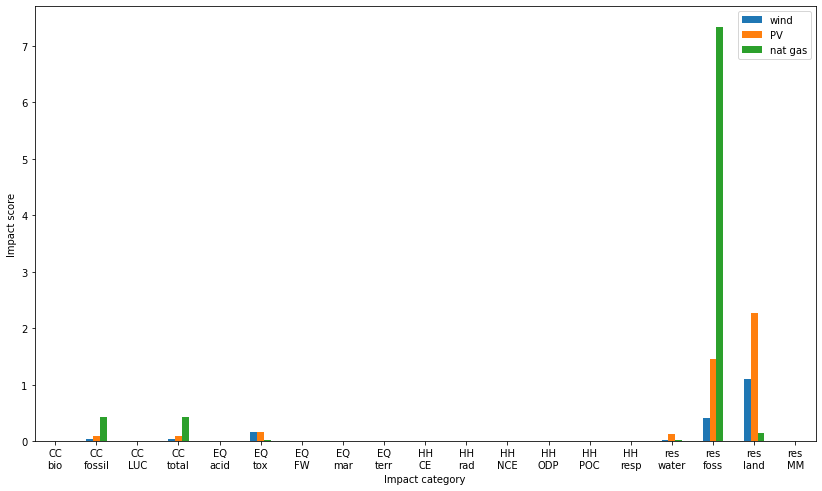

In [7]:
# plot data
df.plot.bar(xlabel='Impact category', ylabel='Impact score', figsize=(14,8))

# rotate xticks for horizontal impact category names
plt.xticks(rotation=0)

Some of the bars are not visible because the impact categories have wildly different units (and hence magnitudes). Let's normalize each category by the largest score. While we're at it, let's also increase the font size and add a grid.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text major ticklabel objects>)

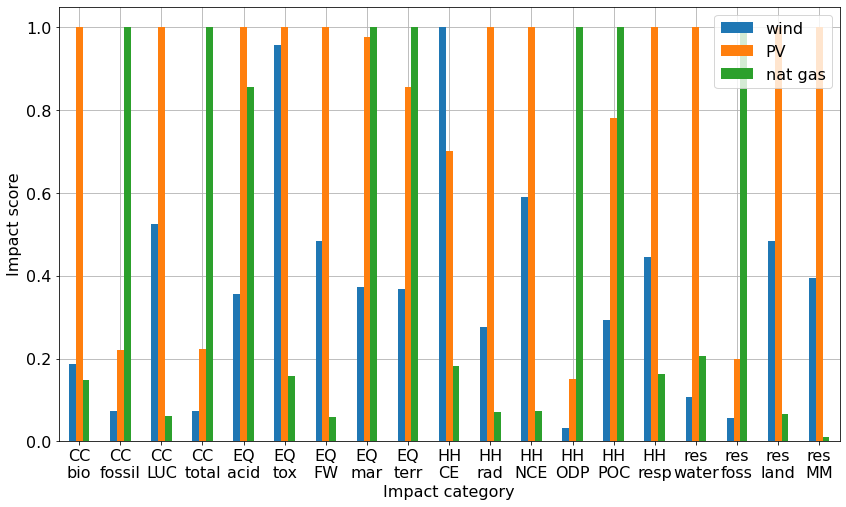

In [8]:
# normalize
df = (df.T / df.abs().max(axis=1)).T

# activate grid and set font size
plt.rcParams.update({
    'font.size': 16,
    'axes.grid': True,
    'axes.grid.which': 'major',
    'axes.axisbelow': True,
})

# plot data
df.plot.bar(xlabel='Impact category', ylabel='Impact score', figsize=(14,8))

# rotate xticks for horizontal impact category names
plt.xticks(rotation=0)

There you go! A nice plot to compare the three technologies.